In [ ]:
import tensorflow.keras as tf  # Import TensorFlow and its Keras API
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import numpy as np  # Import NumPy for numerical operations
import cv2  # Import OpenCV for image manipulation

# Load the MNIST dataset
mnist = tf.datasets.mnist  # Access the MNIST dataset
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()  # Load the data into training and testing sets


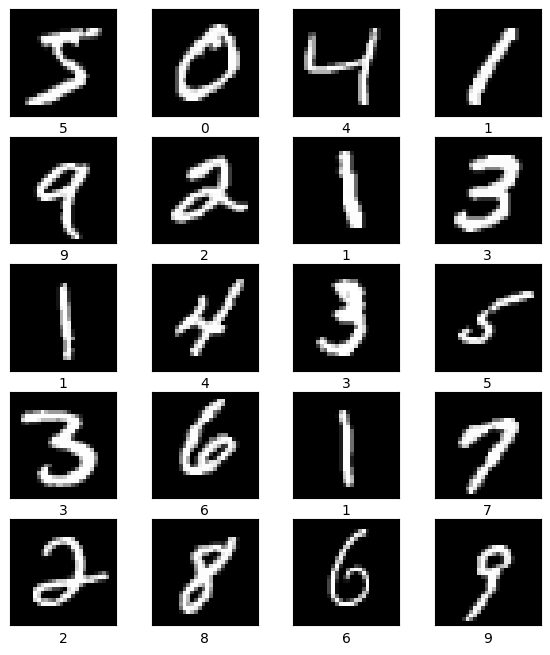

In [ ]:
# Plot a few sample images from the training set
plt.figure(figsize=(7, 8))  # Create a Matplotlib figure for plotting
for i in range(20):  # Loop through the first 20 samples
    plt.subplot(5, 4, i+1)  # Create subplots in a 5x4 grid
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.imshow(xtrain[i], cmap='gray')  # Display the image in grayscale
    plt.xlabel(ytrain[i])  # Set the label to the digit
plt.show()  # Show the plot


In [ ]:
# Define your neural network model
model = tf.models.Sequential()  # Create a Sequential model
model.add(tf.layers.Flatten(input_shape=(28, 28)))  # Add a Flatten layer for input
model.add(tf.layers.Dense(784, activation='relu'))  # Add a Dense hidden layer with ReLU activation
model.add(tf.layers.Dense(10, activation='softmax'))  # Add a Dense output layer with softmax activation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model

# Scale the MNIST data
xtrain_scaled = xtrain / 255.0  # Normalize training data
xtest_scaled = xtest / 255.0  # Normalize testing data

# Train the model
model.fit(xtrain_scaled, ytrain, epochs=15)  # Fit the model to the training data


Epoch 1/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1913 - accuracy: 0.9432
Epoch 2/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0753 - accuracy: 0.9772
Epoch 3/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0489 - accuracy: 0.9850
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0359 - accuracy: 0.9886
Epoch 5/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0267 - accuracy: 0.9915
Epoch 6/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0179 - accuracy: 0.9938
Epoch 8/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 9/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0134 - accuracy: 0.9954
Epoch 10/15
1875/1875 [==============================] - 16s 9ms/step - 

In [ ]:

# Load and preprocess your custom image
img = cv2.imread("/2.png", 0)  # Load the custom image in grayscale
img = cv2.resize(img, (28, 28))  # Resize the image to match the model's input size
img = cv2.bitwise_not(img)  # Perform a bitwise NOT operation on the image
img = img / 255.0  # Normalize the pixel values to [0, 1]
img = img.reshape(1, 28, 28)  # Reshape the image to match the input shape of your model



In [ ]:
# Make a prediction
prediction = model.predict(img)  # Use the model to predict the class probabilities
predicted= np.argmax(prediction)  # Find the class with the highest probability



1/1 [==============================] - 0s 30ms/step


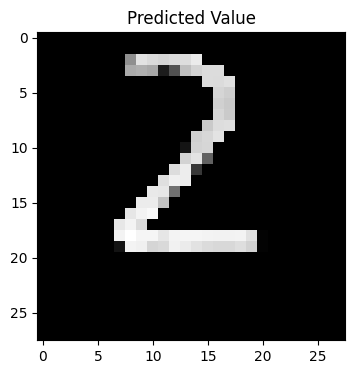

In [ ]:

# Display the predicted image with the predicted class label
plt.figure(figsize=(4, 4))
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Value")
plt.show()


In [ ]:
# Print the predicted class
print("Predicted Value :", predicted)

Predicted Value : 2
